## COMPILAÇÃO JULGADOS

### Importar pacotes e dados

In [2]:
import os
os.chdir("/Users/fernandovieira/OneDrive/1. Educacao/Academia/Artigos Academicos/Conaci CGU/Conaci/Conaci") # mudar a localização da sua máquina
os.getcwd()
os.listdir()

['.DS_Store', 'compilacaoJulgados.ipynb', 'compilacaoJulgados2.xlsx', '.git']

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling

In [5]:
julgados = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados")

### Visão inicial do df

In [6]:
julgados

,TRIBUNAL,DELITO,TIPO,DIREITO
0,STF,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
1,STF,Estelionato,Crime permanente,Previdenciário
2,STF,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
3,STF,Tráfico de drogas,Crime permanente,Penal
4,STF,Tráfico de drogas,Crime permanente,Penal
...,...,...,...,...
149,STM,Insubmissão,Crime permanente,Militar
150,STM,Deserção,Crime instantâneo de efeitos permanentes,Militar
151,STM,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
152,STM,Deserção,Crime instantâneo de efeitos permanentes,Militar


### Resumo por coluna

In [7]:
julgados.groupby(["TRIBUNAL"]).size()

TRIBUNAL
STF    55
STJ    50
STM    17
TRF    25
TSE     7
dtype: int64

In [227]:
julgados.groupby(["TRIBUNAL"]).size().sum()

154

In [8]:
julgados.groupby(["DELITO"]).size()

DELITO
Apropriação indébita                                                   2
Bigamia                                                                1
Casa de prostituição                                                   1
Causar poluição                                                        1
Constituição de milícia privada, associação criminosa ou quadrilha     4
Contrabando e descaminho                                               1
Corrupção ativa                                                        1
Corrupção eleitoral                                                    6
Corrupção passiva                                                      1
Crime contra a ordem tributária                                       29
Deserção                                                               9
Estelionato                                                           47
Evasão de divisas                                                      2
Falsidade ideológica                        

In [9]:
julgados.groupby(["TIPO"]).size()

TIPO
Crime continuado                             29
Crime eventualmente permanente                3
Crime instantâneo de efeitos permanentes     18
Crime permanente                            104
dtype: int64

In [10]:
julgados.groupby(["DIREITO"]).size()

DIREITO
Agrário             2
Ambiental           8
Eleitoral           7
Empresarial         2
Militar            18
Penal              43
Previdenciário     44
Tributário         30
dtype: int64

### Tabelas agregando dados

In [11]:
julgados.groupby(["TRIBUNAL", "DIREITO"]).size() # Ramos do direito por tribunal

TRIBUNAL  DIREITO        
STF       Ambiental           3
          Empresarial         1
          Militar             7
          Penal              22
          Previdenciário     21
          Tributário          1
STJ       Agrário             2
          Ambiental           2
          Empresarial         1
          Penal               8
          Previdenciário     15
          Tributário         22
STM       Militar            11
          Penal               1
          Previdenciário      5
TRF       Ambiental           3
          Penal              12
          Previdenciário      3
          Tributário          7
TSE       Eleitoral           7
dtype: int64

In [13]:
julgados.groupby(["TRIBUNAL", "TIPO"]).size()

TRIBUNAL  TIPO                                    
STF       Crime eventualmente permanente               1
          Crime instantâneo de efeitos permanentes     6
          Crime permanente                            48
STJ       Crime continuado                             3
          Crime eventualmente permanente               2
          Crime instantâneo de efeitos permanentes     8
          Crime permanente                            37
STM       Crime continuado                             6
          Crime instantâneo de efeitos permanentes     4
          Crime permanente                             7
TRF       Crime continuado                            14
          Crime permanente                            11
TSE       Crime continuado                             6
          Crime permanente                             1
dtype: int64

In [14]:
tribunalDireito = julgados.groupby(["TRIBUNAL", "DIREITO"]).size()
tribunalDireito = tribunalDireito.to_frame()
tribunalDireito

0
TRIBUNAL DIREITO            
STF      Ambiental         3
         Empresarial       1
         Militar           7
         Penal            22
         Previdenciário   21
         Tributário        1
STJ      Agrário           2
         Ambiental         2
         Empresarial       1
         Penal             8
         Previdenciário   15
         Tributário       22
STM      Militar          11
         Penal             1
         Previdenciário    5
TRF      Ambiental         3
         Penal            12
         Previdenciário    3
         Tributário        7
TSE      Eleitoral         7

### Dataframes dos dados

In [17]:
dfDelitosTribunal2 = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados2")
dfDelitosTribunal2

,TIPO,TRIBUNAL,QTDE
0,Crime continuado,STJ,3
1,Crime continuado,STM,6
2,Crime continuado,TRF,14
3,Crime continuado,TSE,6
4,Crime eventualmente permanente,STF,1
5,Crime eventualmente permanente,STJ,2
6,Crime instantâneo de efeitos permanentes,STF,6
7,Crime instantâneo de efeitos permanentes,STJ,8
8,Crime instantâneo de efeitos permanentes,STM,4
9,Crime permanente,STF,48


In [18]:
dfDelitosTribunal3 = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados3")
dfDelitosTribunal3

,TIPO,QTDE
0,Crime continuado,29
1,Crime eventualmente permanente,3
2,Crime instantâneo de efeitos permanentes,18
3,Crime permanente,104


### Gráficos

#### Gráfico 1

In [37]:
x = dfDelitosTribunal2.iloc[:,0]
y = dfDelitosTribunal2.iloc[:,2]

In [154]:
plt.rcdefaults() 

In [159]:
plt.style.use("ggplot")

[]

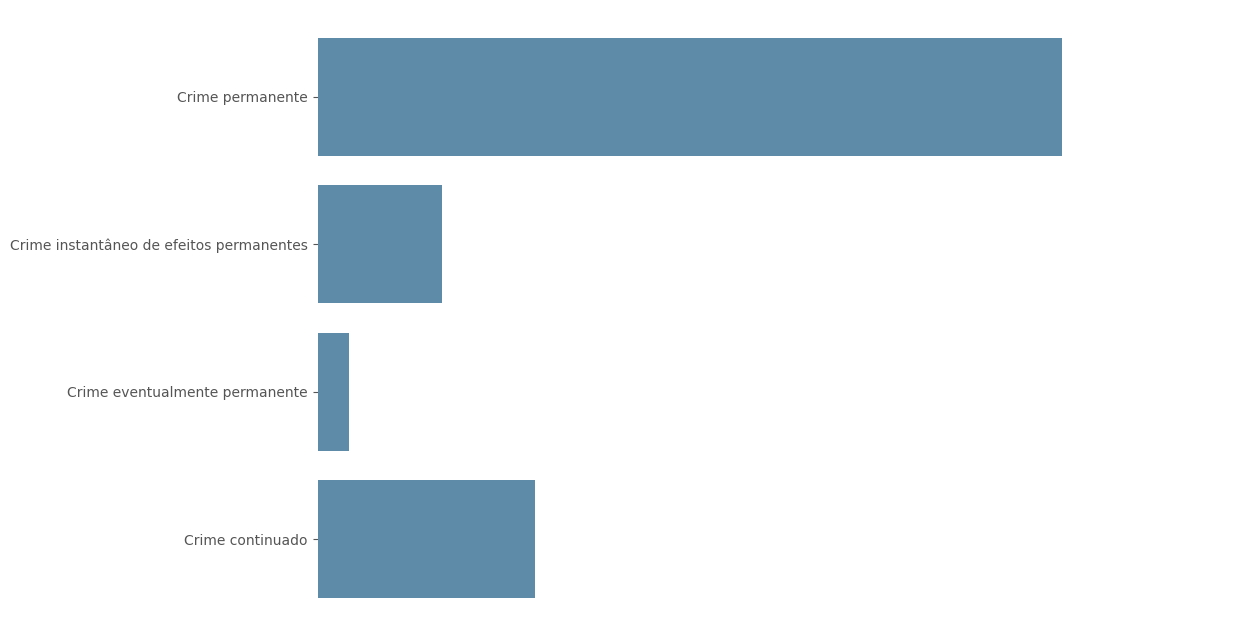

In [164]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.barh(x, y, color = "#5E8BA7")
plt.xlim(0, 60)
plt.box(on=None)
ax.set_xticks([])

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [161]:
plt.savefig("/Users/fernandovieira/Desktop/test_dpi_500.png", dpi = 500)

<Figure size 640x480 with 0 Axes>

#### Gráfico 2

In [166]:
import squarify

In [179]:
julgadosTipo = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados5")
julgadosTipo

,CRIMES,QTDE,%
0,Tráfico de drogas,11,0.07
1,Crime contra a ordem tributária,29,0.19
2,Estelionato,47,0.31
3,Penais(outros),27,0.18
4,Militares (diversos),16,0.10
5,Ambientais ou agrários (diversos),13,0.08
6,Eleitorais (diversos),6,0.04
7,Empresarial ou tributário,5,0.03


In [189]:
crimes = ["Tráfico de drogas: 11 \n (7,00%)", "Crimes contra a \n ordem tributária: 29\n (19,00%)", "Estelionato: 47\n (31,00%)", 
          "Penais\n (outros): 27\n (18,00%)", "Militares\n (diversos): 16\n (10,00%)", "Ambientais ou agrários \n (diversos): 13\n (8,00%)",
          "Eleitorais \n(diversos): 6\n (4,00%)", "Empresarial ou\n tributário: 5\n (3,00%)"]
qtde = [11, 29, 47, 27, 16, 13, 6, 5]
cores = ["#0f7216", "#b2790c", "#ffe9a3", "#f9d4d4", "#d35158", "#6A5ACD", "#fc9803", "#eb7aba"]

(0.0, 100.0, 0.0, 100.0)

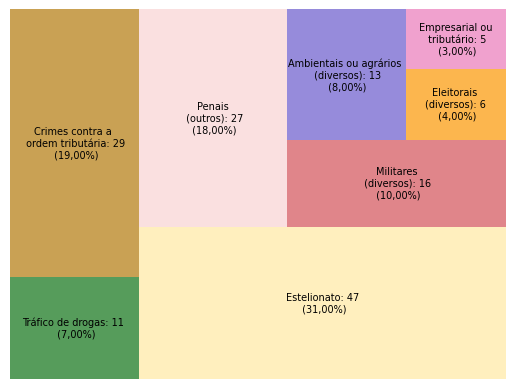

In [190]:
plt.rc("font", size=7)
squarify.plot(sizes = qtde, label = crimes, color = cores, alpha=0.7)
plt.axis("off")

#### Gráfico 3

In [192]:
from pywaffle import Waffle
from matplotlib import cm
# https://fontawesome.com/icons?d=gallery

In [307]:
crimes2 = {"Tráfico de drogas": 11, "Crimes contra a \n ordem tributária": 29, "Estelionato": 47, 
          "Penais\n (outros)": 27, "Militares\n (diversos)": 16, "Ambientais ou agrários \n (diversos)": 13,
          "Eleitorais \n(diversos)": 6, "Empresarial ou\n tributário": 5}

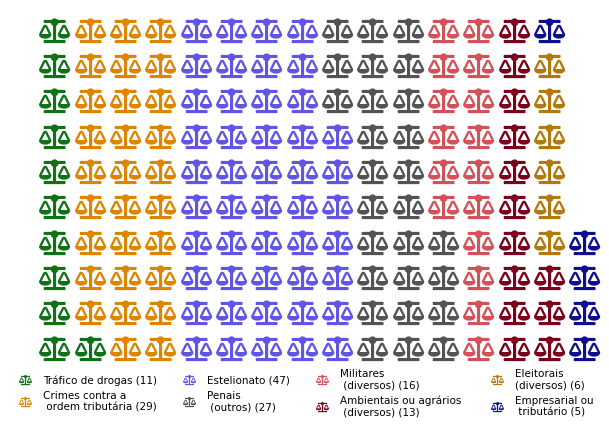

In [316]:
fig = plt.figure(
	FigureClass = Waffle, 
    rows = 10, 
    values = crimes2, 
    colors = ("#0f7216", "#de8500", "#6155e6", "#545252", "#d35158", "#7a001b", "#b2790c", "#0d0f8c"),
    labels = ["{0} ({1})".format(k, v) for k, v in crimes2.items()],
    legend={"loc": "lower left", "bbox_to_anchor": (-0.06, -0.2), "ncol": 4, "framealpha": 0, "fontsize": 7.5},
    icons = "balance-scale", icon_size = 18,
    icon_legend = True,
	)
fig.gca().set_facecolor("#EEEEEE")
fig.set_facecolor("#ffffff")
plt.show()